# Project Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/Users/edwardgoh/Desktop/DA_projects/Portfolio/Data/supermart_grocery_sales/Supermart Grocery Sales - Retail Analytics Dataset.csv'

# Data pre-processing

## Loading Data

In [2]:
# Loading data into sgs(supermart grocery sales) dataframe
sgs = pd.read_csv(filepath)

print(sgs.shape)
sgs.head()

(9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


Previewing the dataset shows that there are 9994 entries with 11 columns. 

There is the Order ID column which is the primary key. 
Customer Name column that records the customer that made the purchase

For categorical columns ,there are the [category, sub category, city, region, state]columns that has some detail about each individual order.

There is a Order Date column recording the dates of the order, and finally there is the numerical cols like [Sales, Discount and Profit]

## Data Cleaning

There are a few things that needs to be checked and done before the analysis can proceed.
1. Renaming columns to eliminate empty space in between column names
2. Validating that columns have the appropriate data type
3. Check and remove N/A values or duplicated values if any
4. Check for anomalies in categorical and numerical columns (typo errors, values that don't make sense, etc.)

---
### Renaming Columns for easier access

In [3]:
rename_dict = {'Order ID':'order_id',
               'Customer Name':'customer_name',
               'Category':'category',
               'Sub Category':'sub_category',
               'City':'city',
               'Order Date':'order_date',
               'Region':'region',
               'Sales':'sale_price',
               'Discount':'discount',
               'Profit':'profit',
               'State':'state'
              }

sgs = sgs.rename(columns=rename_dict).copy()

### Validating the datatype of each column

Checking the datatypes of the resepective columns.

In [4]:
for col in sgs.columns:
    print(col + ' has the datatype: \t',  sgs[col].dtype)

order_id has the datatype: 	 object
customer_name has the datatype: 	 object
category has the datatype: 	 object
sub_category has the datatype: 	 object
city has the datatype: 	 object
order_date has the datatype: 	 object
region has the datatype: 	 object
sale_price has the datatype: 	 int64
discount has the datatype: 	 float64
profit has the datatype: 	 float64
state has the datatype: 	 object


Looking at the results, the order date is not recognised as a datetime object. It needs to be converted to a datetime object column.

In [5]:
# Converting order_date to datetime datatype
sgs['order_date'] = pd.to_datetime(sgs['order_date'])

### Checking for N/A and duplicate values

In [6]:
sgs.isna().all()

order_id         False
customer_name    False
category         False
sub_category     False
city             False
order_date       False
region           False
sale_price       False
discount         False
profit           False
state            False
dtype: bool

In [7]:
sgs.duplicated().sum()

0

### Checking for weird values or any error in data

First, the categorical columns are checked. Histograms for the columns were plotted for easier inspection

In [8]:
categorical_columns = ['category','sub_category','city','region', 'state']

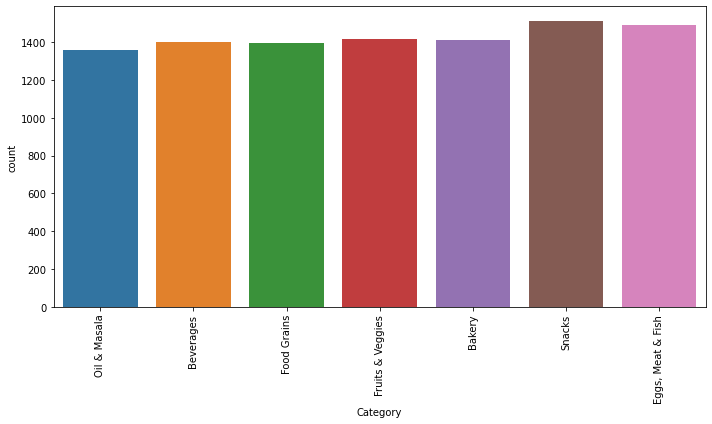

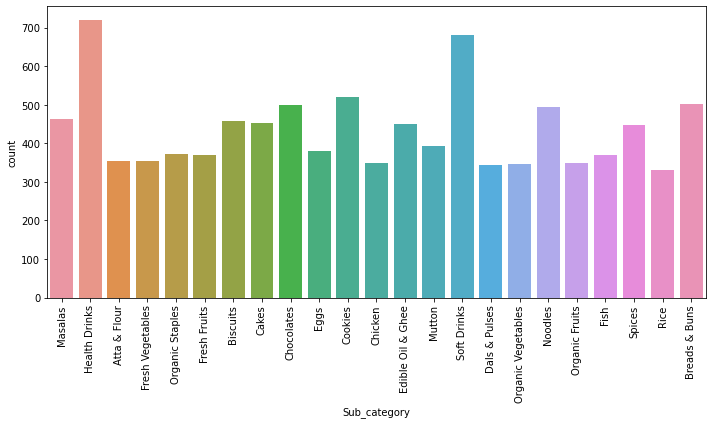

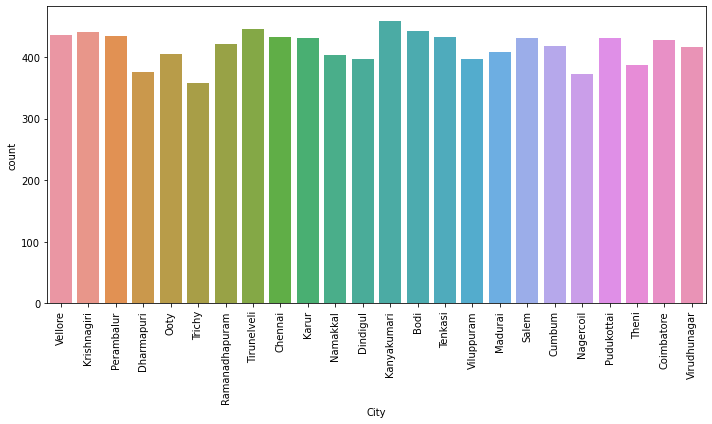

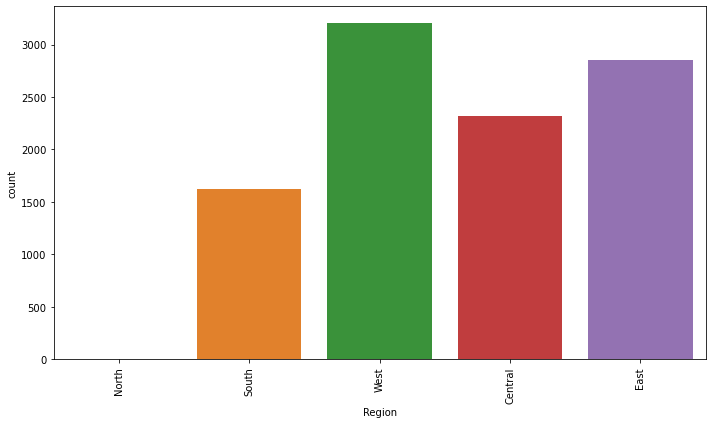

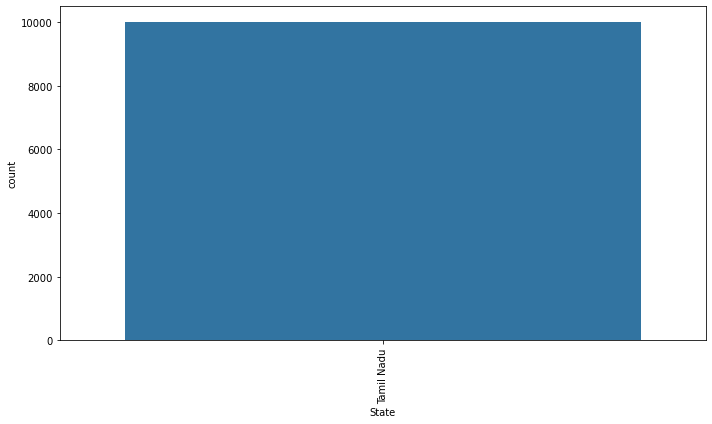

In [9]:
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=sgs)
    plt.xlabel(col.capitalize())
    plt.xticks(rotation='90')
    plt.tight_layout()
    plt.show()

In [10]:
sgs.region.value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64

From the histograms, the findings are:
1. Region column - there is only one row of data for the north region. Considering the fact that it is only one column, it is safe to drop it without much concern of loss of data. 
2. The State column contains exclusively one value, which is "Tamil Nadu". This might be a dataset that is filtered by this state in the first place. Considering this, it is safe to drop the entire column as it won't be helpful in the analysis.

In [11]:
# Removing the state column
sgs = sgs.drop(columns=['state']).copy()

# Removing the row of data that contains region == North
index_to_remove = sgs[sgs.region == 'North'].index.values
sgs = sgs.drop(index = index_to_remove).copy()

In [27]:
# Vallidating that the "North" entry has been removed

print(sgs.columns)
print("")
print(sgs.region.value_counts())


Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sale_price', 'discount', 'profit'],
      dtype='object')

West       3203
East       2848
Central    2323
South      1619
Name: region, dtype: int64


### Checking numerical columns anomalies

In [13]:
x = list(sgs.columns.values)


In [14]:
numerical_cols = ['sale_price','discount','profit']

In [15]:
numerical_cols = []

In [16]:
categorical_columns

['category', 'sub_category', 'city', 'region', 'state']

1. Determine which items sells the best - gives the best profit
2. Which items sells the worst - is there anything actionable

Ideas for metrics of investigation
1. Over time - is the performance consistent or had a sudden spike
2. By region ?

Hypothesis testing
1. Any difference in sales distribution between regions for certain sales product, chi_square? anova?
2. Does a good/poor performing item perform better in a specific region/city?

In [17]:
# Adding features
sgs

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70
...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


In [18]:
no_of_sales_per_category =  sgs['category'].value_counts().rename('no_of_sales')
sum_sales_profit_per_category = sgs.groupby('category')[['sale_price','profit']].sum()

In [19]:
summary_by_category = pd.merge(left=no_of_sales_per_category, right=sum_sales_profit_per_category, left_index=True, right_index=True)

In [20]:
summary_by_category

,no_of_sales,sale_price,profit
Snacks,1514,2237546,568178.85
"Eggs, Meat & Fish",1490,2267401,567357.22
Fruits & Veggies,1418,2100727,530400.38
Bakery,1413,2112281,528521.06
Beverages,1400,2085313,525605.76
Food Grains,1398,2115272,529162.64
Oil & Masala,1360,2037188,497494.01
